In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [6]:
file_path = r"D:\Projects\guidewire\k8s_failure_prediction\data\balanced_shuffled_traffic.csv"
df = pd.read_csv(file_path)

In [7]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     8621 non-null   object 
 1   Src IP                      8621 non-null   object 
 2   Src Port                    8621 non-null   int64  
 3   Dst IP                      8621 non-null   object 
 4   Dst Port                    8621 non-null   int64  
 5   Protocol                    8621 non-null   int64  
 6   Timestamp                   8621 non-null   object 
 7   Flow Duration               8621 non-null   int64  
 8   Total Fwd Packet            8621 non-null   int64  
 9   Total Bwd packets           8621 non-null   int64  
 10  Total Length of Fwd Packet  8621 non-null   int64  
 11  Total Length of Bwd Packet  8621 non-null   int64  
 12  Fwd Packet Length Max       8621 non-null   int64  
 13  Fwd Packet Length Mean      8621 

In [8]:
print(df.isnull().sum())

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT Total                 0
Bwd IAT Mean                  0
Bwd IAT 

In [9]:
drop_columns = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']  # Adjust as per relevance
df.drop(columns=drop_columns, inplace=True, errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src Port                    8621 non-null   int64  
 1   Dst Port                    8621 non-null   int64  
 2   Protocol                    8621 non-null   int64  
 3   Flow Duration               8621 non-null   int64  
 4   Total Fwd Packet            8621 non-null   int64  
 5   Total Bwd packets           8621 non-null   int64  
 6   Total Length of Fwd Packet  8621 non-null   int64  
 7   Total Length of Bwd Packet  8621 non-null   int64  
 8   Fwd Packet Length Max       8621 non-null   int64  
 9   Fwd Packet Length Mean      8621 non-null   float64
 10  Fwd Packet Length Std       8621 non-null   float64
 11  Bwd Packet Length Max       8621 non-null   int64  
 12  Bwd Packet Length Mean      8621 non-null   float64
 13  Bwd Packet Length Std       8621 

In [11]:
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8689855072463768

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       899
           1       0.85      0.88      0.86       826

    accuracy                           0.87      1725
   macro avg       0.87      0.87      0.87      1725
weighted avg       0.87      0.87      0.87      1725



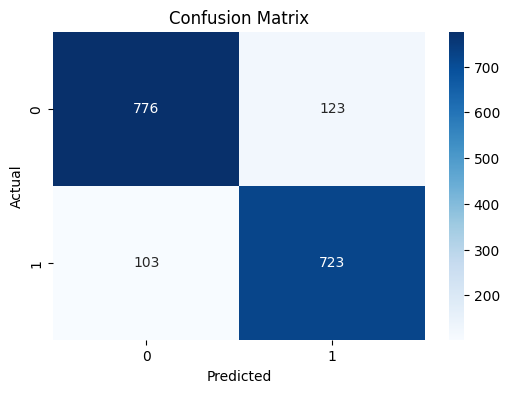

In [15]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Save the trained model
joblib.dump(model, "D:\Projects\guidewire\k8s_failure_prediction\deployment/k8s_failure_model.pkl")
joblib.dump(scaler, "D:\Projects\guidewire\k8s_failure_prediction\deployment/scaler.pkl")

['D:\\Projects\\guidewire\\k8s_failure_prediction\\deployment/scaler.pkl']

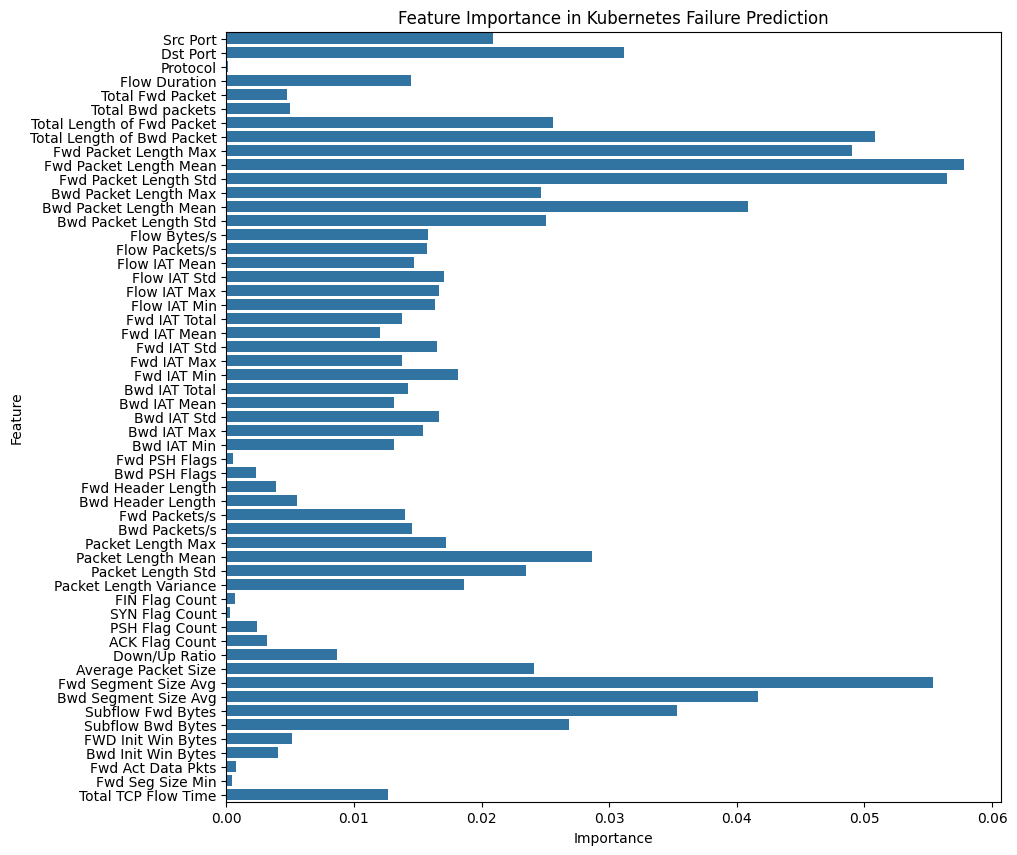

In [16]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Kubernetes Failure Prediction")
plt.show()


In [21]:
df.to_csv('output.csv', index=False)  # 'index=False' prevents writing row indices

In [17]:
import random

# Select a random row from df
random_index = random.randint(0, len(df) - 1)
random_sample = df.iloc[random_index]

# Extract features and actual label
X_sample = random_sample.drop("Label").values.reshape(1, -1)  # Assuming "Label" is the target column
actual_output = random_sample["Label"]

# Make prediction
predicted_output = model.predict(X_sample)[0]

# Display results
print(f"Random Sample Index: {random_index}")
print(f"Actual Output: {actual_output}")
print(f"Predicted Output: {predicted_output}")


Random Sample Index: 5136
Actual Output: 1.0
Predicted Output: 1


EXPERIMENTATION

In [9]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(best_rf, "D:\\Projects\\guidewire\\k8s_failure_prediction\\models\\k8s_failure_model.pkl")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.8742028985507246
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       899
           1       0.86      0.88      0.87       826

    accuracy                           0.87      1725
   macro avg       0.87      0.87      0.87      1725
weighted avg       0.87      0.87      0.87      1725



['D:\\Projects\\guidewire\\k8s_failure_prediction\\models\\k8s_failure_model.pkl']

In [19]:
import xgboost as xgb
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to balance failures & normal cases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train an optimized XGBoost model
xgb_final = xgb.XGBClassifier(
    n_estimators=500,  # More trees
    learning_rate=0.1,  # Higher learning rate
    max_depth=6,  # Slightly shallower trees
    colsample_bytree=0.7,  # Less feature correlation
    subsample=0.8,  # Prevent overfitting
    gamma=2,  # Reduce unnecessary splits
    reg_lambda=3,  # L2 regularization
    eval_metric="logloss"
)

xgb_final.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = xgb_final.predict(X_test)
print("🚀 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ Save the trained model
joblib.dump(xgb_final, "D:\\Projects\\guidewire\\k8s_failure_prediction\\models\\test3.pkl")

print("✅ Improved Model Saved as 'test3.pkl'")


d:\Projects\guidewire\k8s_failure_prediction\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Projects\guidewire\k8s_failure_prediction\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Projects\guidewire\k8s_failure_prediction\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\ampra\AppData\Local\Programs\Python\Python39\lib\

🚀 Accuracy: 0.8742028985507246
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       899
           1       0.85      0.90      0.87       826

    accuracy                           0.87      1725
   macro avg       0.87      0.88      0.87      1725
weighted avg       0.88      0.87      0.87      1725

✅ Improved Model Saved as 'test3.pkl'


In [22]:
import numpy as np
import joblib
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.7, random_state=42, eval_metric="logloss")),
    ('lgbm', lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.7, random_state=42))
]

# Meta-model (final decision maker)
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacked_model.predict(X_test)
print("🚀 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ Save the ensemble model
joblib.dump(stacked_model, "D:\\Projects\\guidewire\\k8s_failure_prediction\\models\\test4.pkl")

print("✅ Stacked Model Saved as 'test3.pkl'")


🚀 Accuracy: 0.8742028985507246
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       899
           1       0.86      0.89      0.87       826

    accuracy                           0.87      1725
   macro avg       0.87      0.87      0.87      1725
weighted avg       0.87      0.87      0.87      1725

✅ Stacked Model Saved as 'test3.pkl'


d:\Projects\guidewire\k8s_failure_prediction\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
